Original Diabetes Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


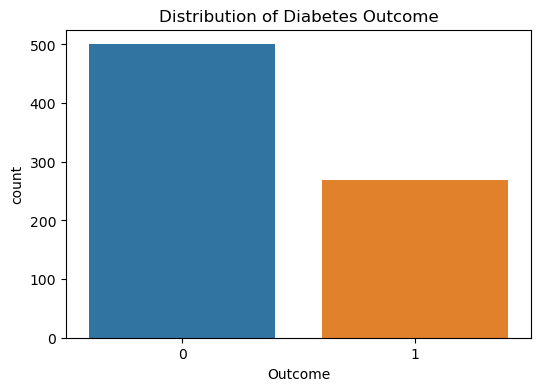

Cleaned Diabetes Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


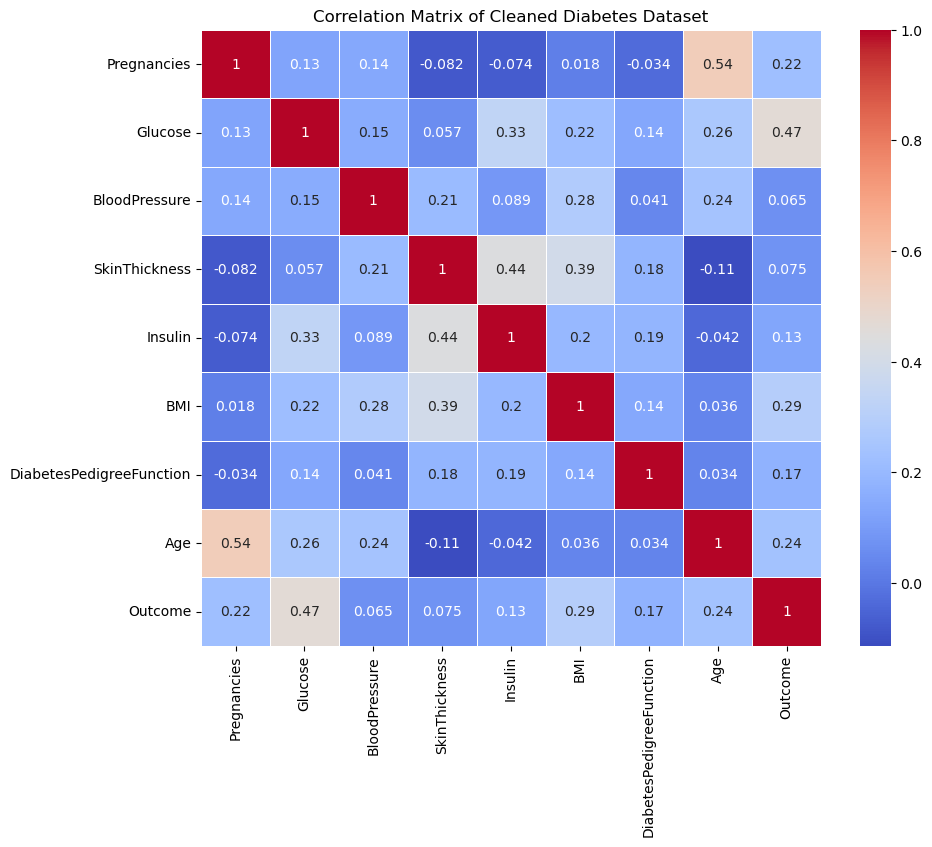

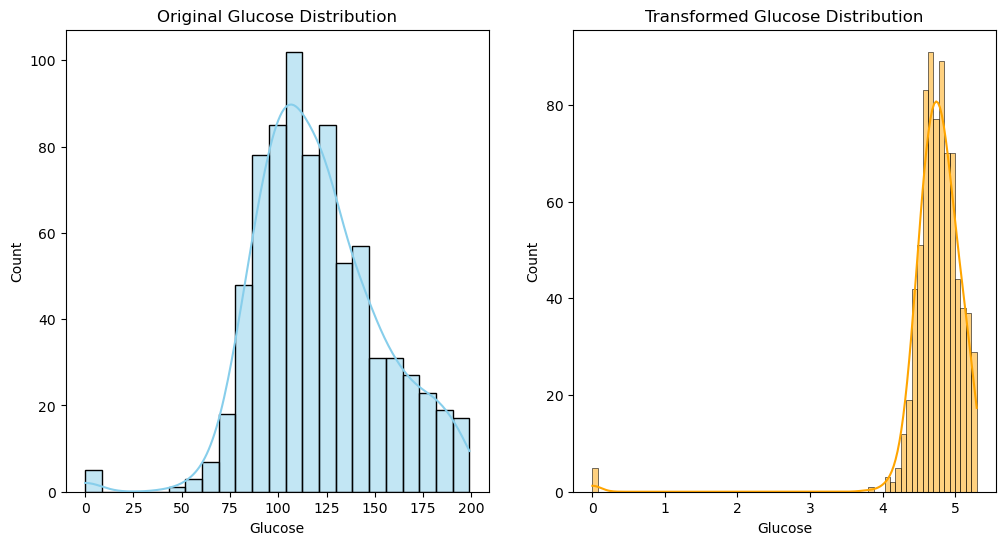

<Figure size 1200x800 with 0 Axes>

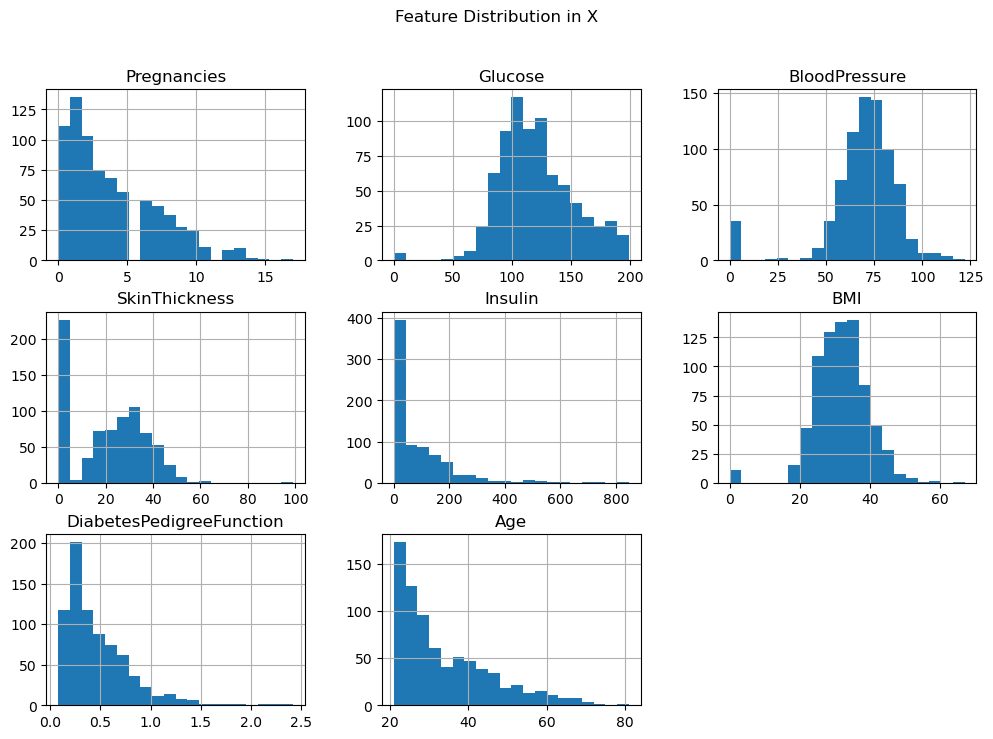

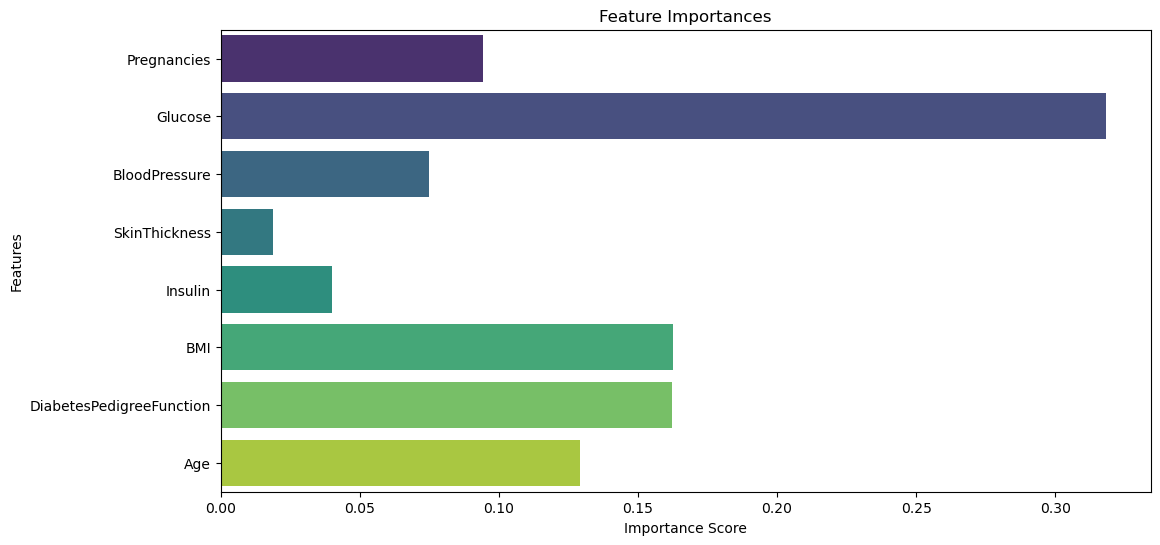

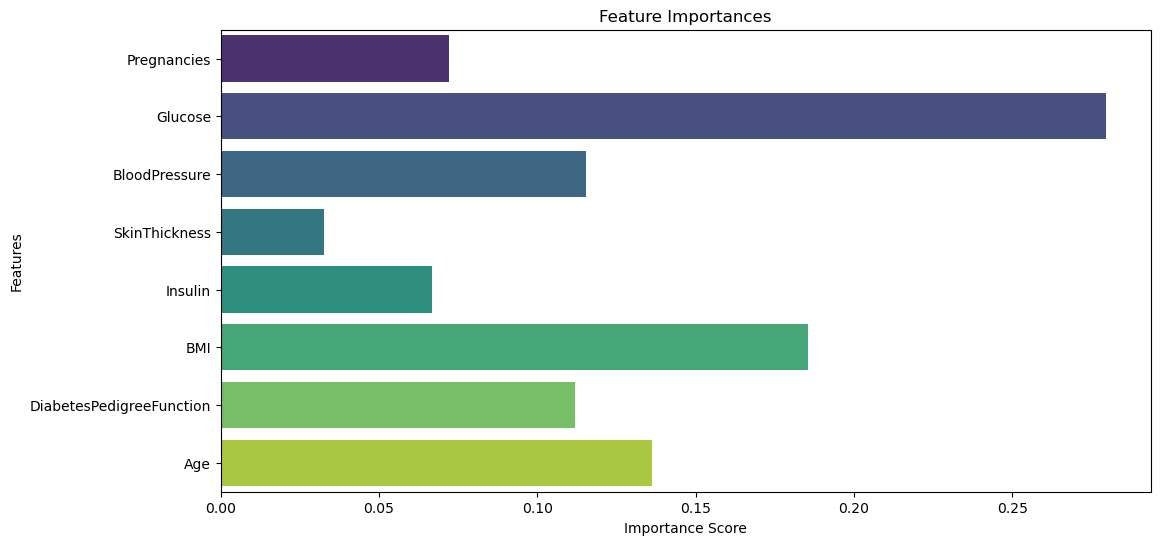

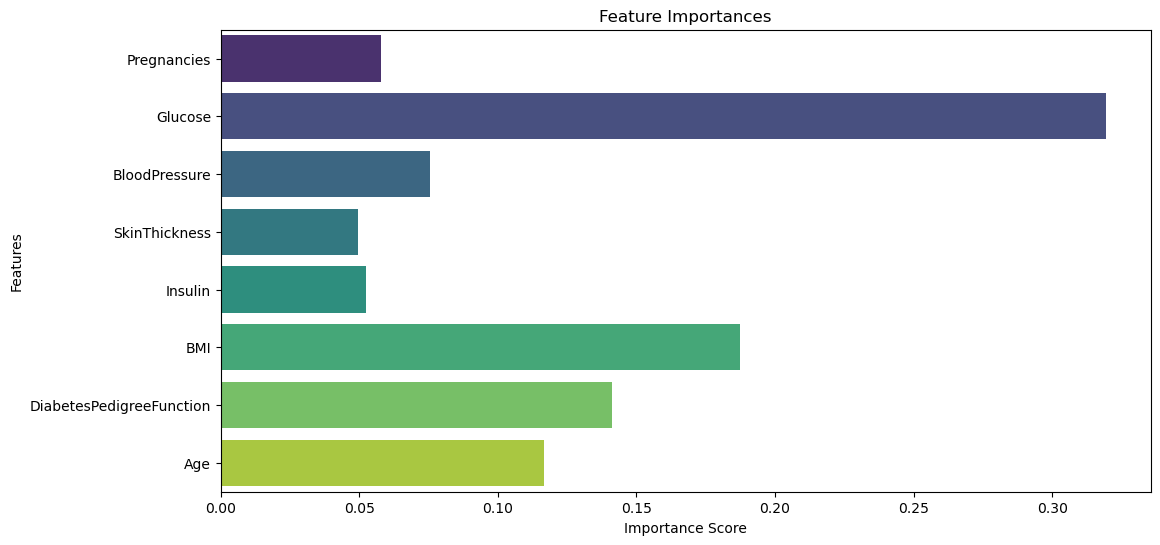

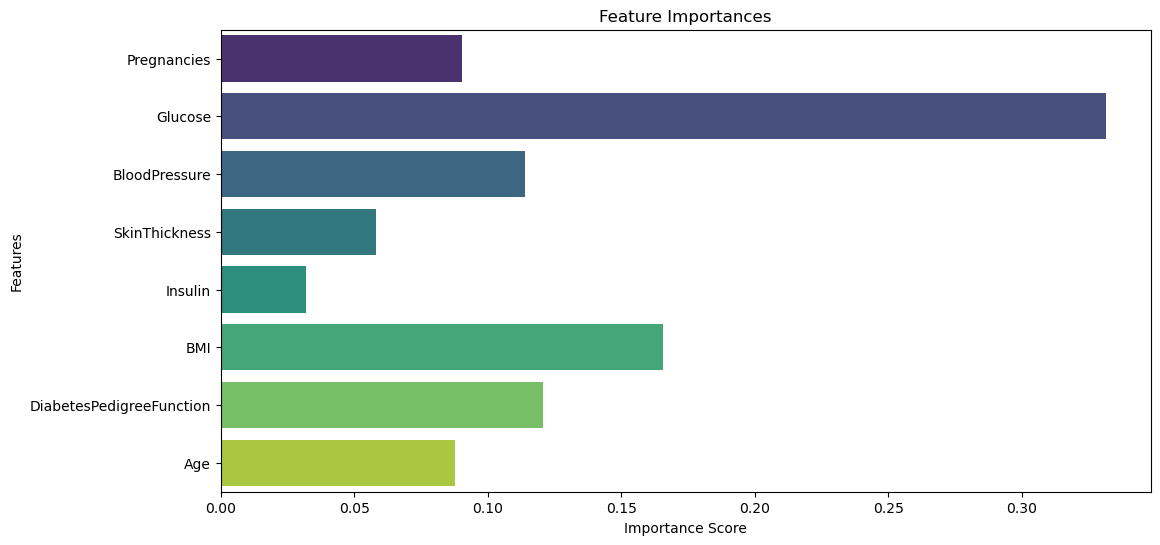

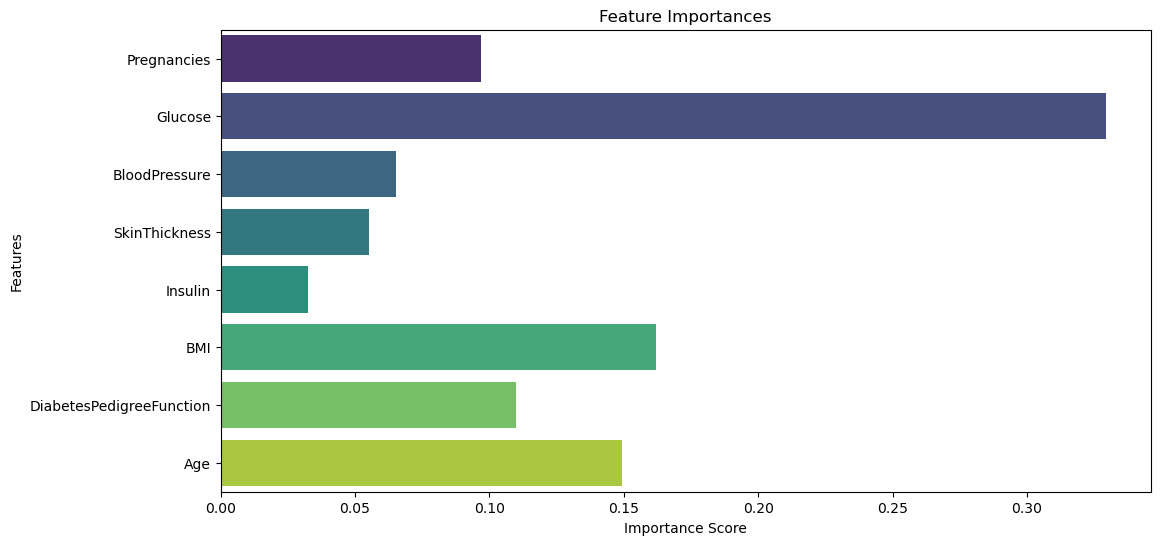

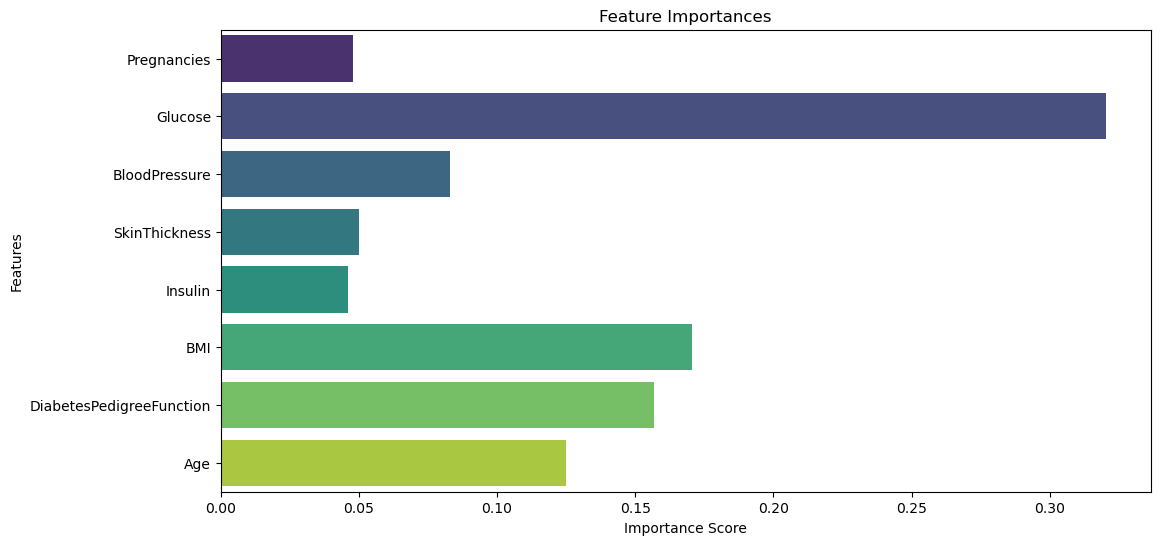

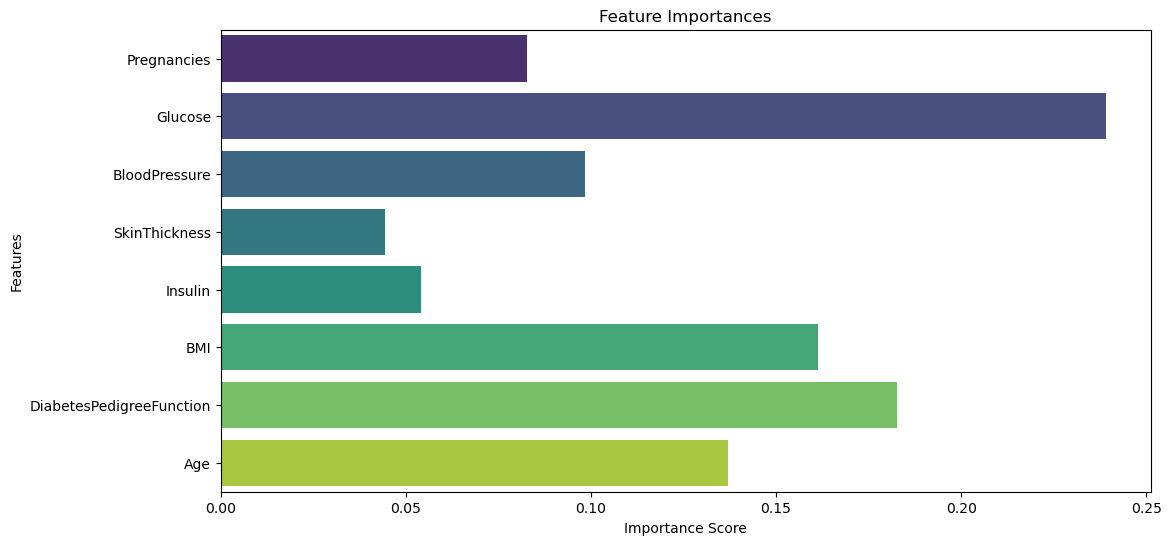

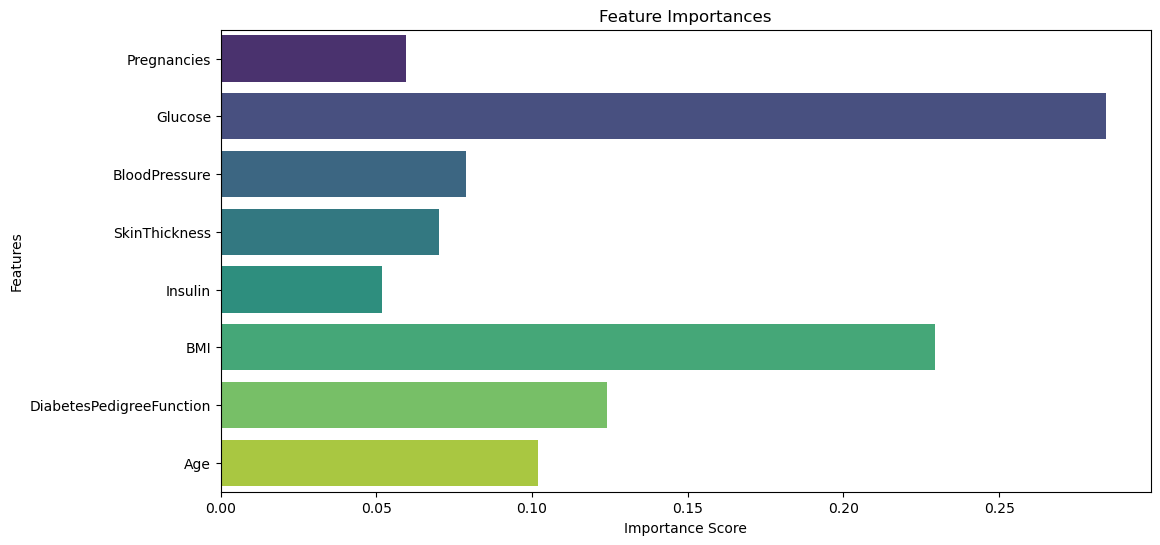

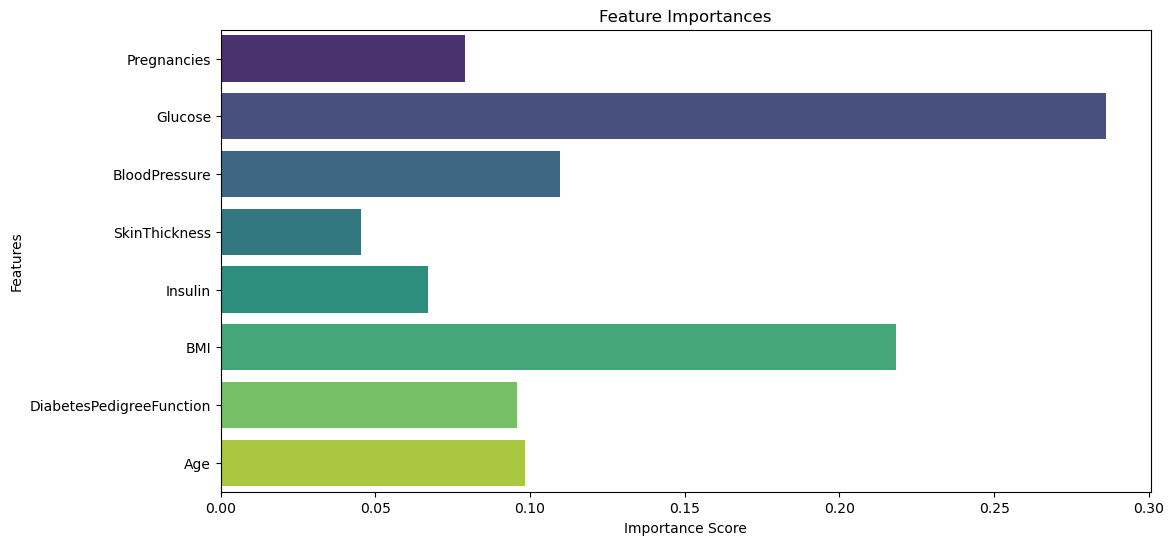

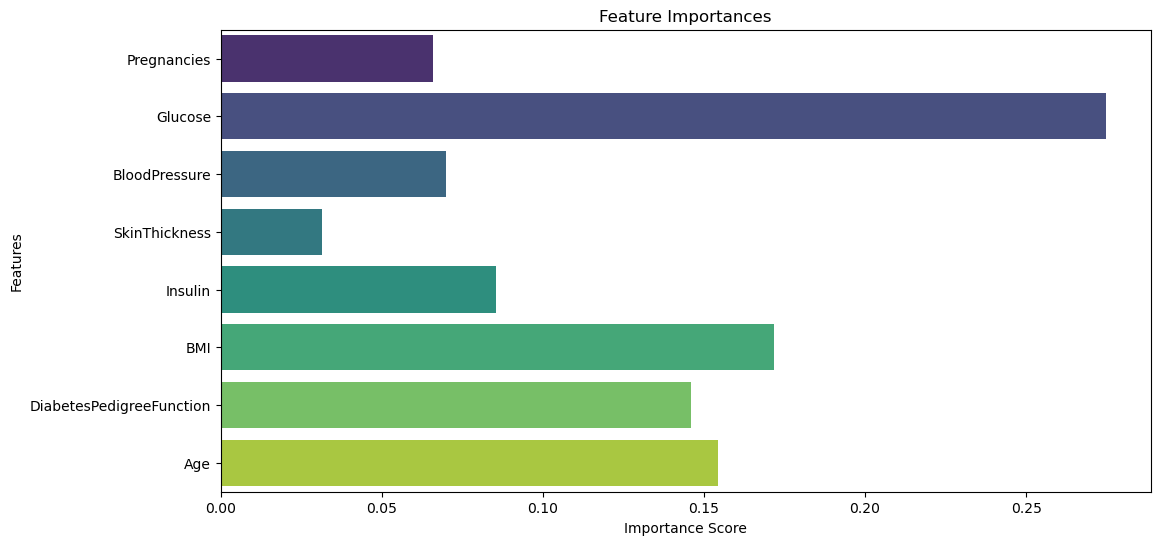

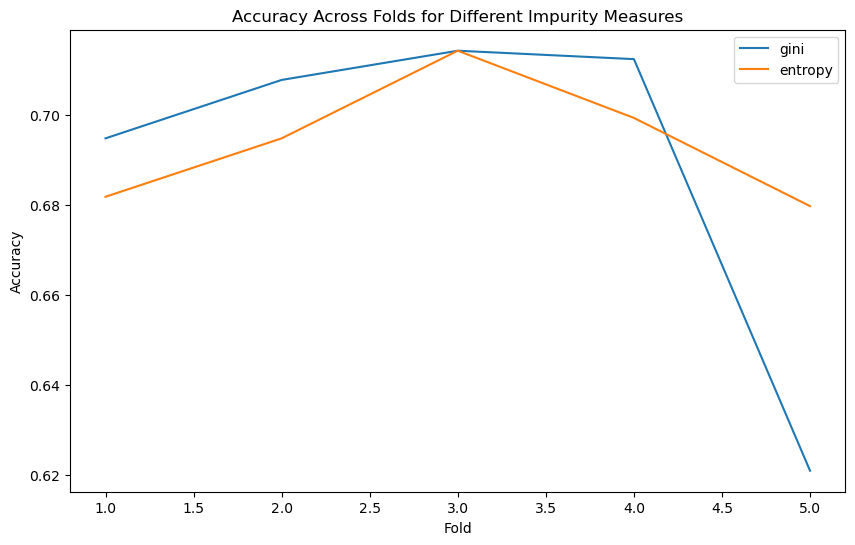

Mean Accuracy for Gini: 0.6900
Mean Accuracy for Entropy: 0.6940
The preferred impurity measure is entropy


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the diabetes dataset and print the first few rows.
df = pd.read_csv('diabetes.csv')
print("Original Diabetes Dataset:")
print(df.head())

# Visualize the distribution of the target variable (Outcome).
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

# Drop any columns or rows with missing values.
df_cleaned = df.dropna(axis=1).dropna()

# Visualize the cleaned dataset.
print("Cleaned Diabetes Dataset:")
print(df_cleaned.head())

# Visualize the correlation matrix of the cleaned dataset.
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Cleaned Diabetes Dataset')
plt.show()

# Feature Distribution Comparison: Original vs. Transformed
# Choose a feature for comparison (e.g., 'Glucose').
feature_to_compare = 'Glucose'

# Visualize the distribution of the chosen feature in the original dataset.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[feature_to_compare], kde=True, color='skyblue')
plt.title(f'Original {feature_to_compare} Distribution')

# Transform the chosen feature (e.g., applying log transformation).
transformed_feature = np.log1p(df[feature_to_compare])

# Visualize the distribution of the transformed feature.
plt.subplot(1, 2, 2)
sns.histplot(transformed_feature, kde=True, color='orange')
plt.title(f'Transformed {feature_to_compare} Distribution')

plt.show()

# Model Training and Evaluation
# Separate the features (X) and target variable (y) from the dataset.
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome']

# Visualize the distribution of each feature in X.
plt.figure(figsize=(12, 8))
X.hist(bins=20, figsize=(12, 8))
plt.suptitle('Feature Distribution in X')
plt.show()

# Set up Stratified K-Fold cross-validation.
SF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define impurity measures for Decision Tree.
impurity_measures = [
    {'criterion': 'gini', 'max_depth': X.shape[1] * 10},
    {'criterion': 'entropy', 'max_depth': X.shape[1] * 10}
]

# Initialize an empty list to store accuracy values for each parameter set and fold.
accuracy_values = []

# Loop over impurity measures.
for impurity_measure in impurity_measures:
    # Loop over each fold in Stratified K-Fold.
    for train_idx, test_idx in SF.split(X, y):
        # Split the data into training and testing sets.
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Initialize a DecisionTreeClassifier with impurity measures.
        dtc = DecisionTreeClassifier(criterion=impurity_measure['criterion'], max_depth=impurity_measure['max_depth'])
        
        # Fit the model on the training data.
        dtc.fit(X_train, y_train)

        # Visualize feature importances instead of the Decision Tree model.
        feature_importances = dtc.feature_importances_
        features = X.columns
        plt.figure(figsize=(12, 6))
        sns.barplot(x=feature_importances, y=features, palette="viridis")
        plt.title('Feature Importances')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.show()

        # Make predictions on the testing data.
        y_pred = dtc.predict(X_test)

        # Calculate the accuracy.
        accuracy = accuracy_score(y_test, y_pred)
        
        # Append the accuracy value to the list.
        accuracy_values.append({'impurity': impurity_measure['criterion'], 'accuracy': accuracy})

# Visualize the accuracy values.
plt.figure(figsize=(10, 6))
for impurity_measure in impurity_measures:
    accuracies = [result['accuracy'] for result in accuracy_values if result['impurity'] == impurity_measure['criterion']]
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=f"{impurity_measure['criterion']}")

plt.title('Accuracy Across Folds for Different Impurity Measures')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate the mean accuracy for each impurity measure (across all folds).
mean_accuracies = {impurity_measure['criterion']: np.mean(
    [result['accuracy'] for result in accuracy_values if result['impurity'] == impurity_measure['criterion']]
) for impurity_measure in impurity_measures}

# Print the mean accuracy for each impurity measure.
print("Mean Accuracy for Gini: {:.4f}".format(mean_accuracies['gini']))
print("Mean Accuracy for Entropy: {:.4f}".format(mean_accuracies['entropy']))

# Decide which is the best impurity measure based on mean accuracy.
best_impurity = max(mean_accuracies, key=mean_accuracies.get)
print("The preferred impurity measure is {}".format(best_impurity))
